In [46]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df1 = pd.read_csv('deliveries.csv')
df1.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

In [3]:
df2 = pd.read_csv('matches.csv')
df2.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2 umpire3  
0     AY Dandekar       NJ Llong     NaN  
1  A Nand Kishore         S Ravi     NaN  
2     Nitin Menon      CK Nandan     NaN  
3    AK Chaudhary  C Shamshuddin     NaN  
4             NaN            NaN     NaN

In [4]:
match1 = df2[(df2['team1'] == 'Kolkata Knight Riders') & (df2['team2'] == 'Royal Challengers Bangalore')]
match2 = df2[(df2['team1'] == 'Royal Challengers Bangalore') & (df2['team2'] == 'Kolkata Knight Riders')]

Match1 = Kolkata Home Ground

Match2 = Bangalore Home Ground

# Overall Bangalore vs Kolkata:

In [5]:
match = pd.concat((match1,match2))
match.head()

id  season       city        date                  team1  \
26    27    2017    Kolkata  2017-04-23  Kolkata Knight Riders   
59    60    2008  Bangalore  2008-04-18  Kolkata Knight Riders   
87    88    2008    Kolkata  2008-05-08  Kolkata Knight Riders   
133  134    2009     Durban  2009-04-29  Kolkata Knight Riders   
155  156    2009  Centurion  2009-05-12  Kolkata Knight Riders   

                           team2                  toss_winner toss_decision  \
26   Royal Challengers Bangalore  Royal Challengers Bangalore         field   
59   Royal Challengers Bangalore  Royal Challengers Bangalore         field   
87   Royal Challengers Bangalore        Kolkata Knight Riders           bat   
133  Royal Challengers Bangalore        Kolkata Knight Riders           bat   
155  Royal Challengers Bangalore  Royal Challengers Bangalore         field   

     result  dl_applied                       winner  win_by_runs  \
26   normal           0        Kolkata Knight Riders           82   
59   normal           0        Kolkata Knight Riders          140   
87   normal           0        Kolkata Knight Riders            5   
133  normal           0  Royal Challengers Bangalore            0   
155  normal           0  Royal Challengers Bangalore            0   

     win_by_wickets  player_of_match                  venue      umpire1  \
26                0  NM Coulter-Nile           Eden Gardens  CB Gaffaney   
59                0      BB McCullum  M Chinnaswamy Stadium    Asad Rauf   
87                0       SC Ganguly           Eden Gardens    Asad Rauf   
133               5       MV Boucher              Kingsmead    MR Benson   
155               6      LRPL Taylor        SuperSport Park    M Erasmus   

            umpire2 umpire3  
26        CK Nandan     NaN  
59      RE Koertzen     NaN  
87        IL Howell     NaN  
133  TH Wijewardene     NaN  
155       SS Hazare     NaN

Matches played between Kolkata and Bangalore

In [6]:
match.shape

(24, 18)

In [7]:
match['winner'].value_counts()

Kolkata Knight Riders          14
Royal Challengers Bangalore    10
Name: winner, dtype: int64

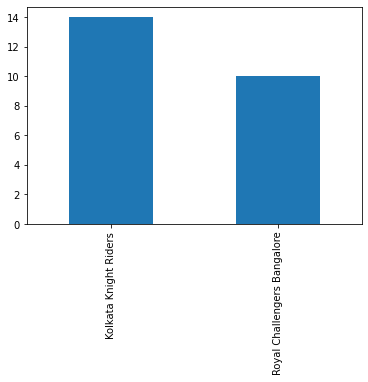

In [47]:
match['winner'].value_counts().plot.bar()
plt.show()

Kolkata won 14 times and Bangalore won 10 times against each other.

In [8]:
match['toss_winner'].value_counts()

Royal Challengers Bangalore    13
Kolkata Knight Riders          11
Name: toss_winner, dtype: int64

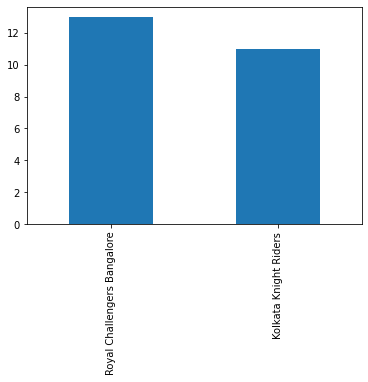

In [48]:
match['toss_winner'].value_counts().plot.bar()
plt.show()

Bangalore won toss 13 times and Kolkata 11 times.

In [9]:
match['toss_decision'].value_counts()

field    21
bat       3
Name: toss_decision, dtype: int64

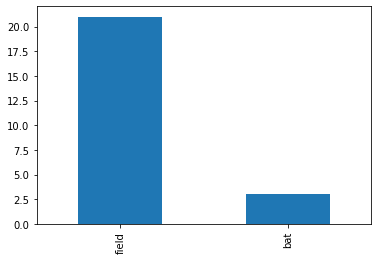

In [50]:
match['toss_decision'].value_counts().plot.bar()
plt.show()

Toss winning team decided to field first 21 times and bat first 3 times.

In [10]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts()

Kolkata Knight Riders          9
Royal Challengers Bangalore    8
Name: winner, dtype: int64

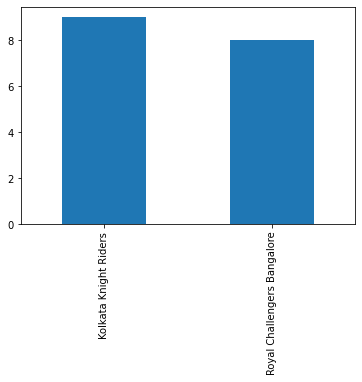

In [51]:
match[match['toss_winner'] == match['winner']]['winner'].value_counts().plot.bar()
plt.show()

Kolkata won the toss and won the match 9 times, whereas Bangalore won 8 times.

In [11]:
ids = list(match['id'])
ids1 = list(match2['id'])
delivery = df1[(df1['match_id'] == ids[0]) | (df1['match_id'] == ids[1]) | (df1['match_id'] == ids[2]) | (df1['match_id'] == ids[3]) | (df1['match_id'] == ids[4]) | (df1['match_id'] == ids[5]) | (df1['match_id'] == ids[6]) | (df1['match_id'] == ids[7]) | (df1['match_id'] == ids[8]) | (df1['match_id'] == ids[9]) | (df1['match_id'] == ids[10]) | (df1['match_id'] == ids[11]) | (df1['match_id'] == ids[12]) | (df1['match_id'] == ids[13]) | (df1['match_id'] == ids[14]) | (df1['match_id'] == ids[15]) | (df1['match_id'] == ids[16]) | (df1['match_id'] == ids[17]) | (df1['match_id'] == ids[18]) | (df1['match_id'] == ids[19]) | (df1['match_id'] == ids[20]) | (df1['match_id'] == ids[21]) | (df1['match_id'] == ids[22]) | (df1['match_id'] == ids[23])]
delivery.head()

match_id  inning           batting_team                 bowling_team  \
6254        27       1  Kolkata Knight Riders  Royal Challengers Bangalore   
6255        27       1  Kolkata Knight Riders  Royal Challengers Bangalore   
6256        27       1  Kolkata Knight Riders  Royal Challengers Bangalore   
6257        27       1  Kolkata Knight Riders  Royal Challengers Bangalore   
6258        27       1  Kolkata Knight Riders  Royal Challengers Bangalore   

      over  ball    batsman non_striker    bowler  is_super_over  ...  \
6254     1     1  SP Narine   G Gambhir  S Badree              0  ...   
6255     1     2  SP Narine   G Gambhir  S Badree              0  ...   
6256     1     3  SP Narine   G Gambhir  S Badree              0  ...   
6257     1     4  SP Narine   G Gambhir  S Badree              0  ...   
6258     1     5  SP Narine   G Gambhir  S Badree              0  ...   

      bye_runs  legbye_runs  noball_runs  penalty_runs  batsman_runs  \
6254         0            0            0             0             0   
6255         0            0            0             0             4   
6256         0            0            0             0             4   
6257         0            0            0             0             4   
6258         0            0            0             0             6   

      extra_runs  total_runs  player_dismissed dismissal_kind fielder  
6254           0           0               NaN            NaN     NaN  
6255           0           4               NaN            NaN     NaN  
6256           0           4               NaN            NaN     NaN  
6257           0           4               NaN            NaN     NaN  
6258           0           6               NaN            NaN     NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Bangalore and Kolkata.

In [12]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## Dinesh Karthik playing for Kolkata:

In [13]:
total_run_Dinesh_Karthik_kkr = delivery[delivery['batsman'] == 'KD Karthik']['batsman_runs'].sum()
total_run_Dinesh_Karthik_kkr

88

Dinesh Karthik for Kolkata scored 88 runs against Bangalore.

In [14]:
total_matches_against_Bangalore_for_Kolkata = len(delivery[delivery['batsman'] == 'KD Karthik']['match_id'].value_counts())
total_matches_against_Bangalore_for_Kolkata

4

Total matches played against Bangalore and being in Kolkata.

In [15]:
avg_run_Dinesh_Karthik_kkr = math.ceil(total_run_Dinesh_Karthik_kkr/total_matches_against_Bangalore_for_Kolkata)
avg_run_Dinesh_Karthik_kkr

22

Dinesh Karthik scored an average of 22 per match against Bangalore and being in Kolkata.

In [16]:
total_run_Dinesh_Karthik_batting_first_kkr = delivery[(delivery['batsman'] == 'KD Karthik') & (delivery['inning']==1)]['batsman_runs'].sum()
total_run_Dinesh_Karthik_batting_first_kkr

0

Dinesh Karthik didn't bat for Kolkata in the first inning yet.

In [17]:
total_run_Dinesh_Karthik_batting_second_kkr = delivery[(delivery['batsman'] == 'KD Karthik') & (delivery['inning']==2)]['batsman_runs'].sum()
total_run_Dinesh_Karthik_batting_second_kkr

88

Dinesh Karthik scored 88 runs while batting in second inning.

## Dinesh Karthik Overall:

In [18]:
total_run_Dinesh_Karthik = df1[(df1['batsman'] == 'KD Karthik') & (df1['bowling_team'] == 'Royal Challengers Bangalore')]['batsman_runs'].sum()
total_run_Dinesh_Karthik

419

Dinesh Karthik overall scored 419 runs against Bangalore.

In [19]:
total_matches_against_Bangalore = len(df1[(df1['batsman'] == 'KD Karthik') & (df1['bowling_team'] == 'Royal Challengers Bangalore')]['match_id'].value_counts())
total_matches_against_Bangalore

20

Total matches played against Bangalore.

In [20]:
avg_run_Dinesh_Karthik = math.ceil(total_run_Dinesh_Karthik/total_matches_against_Bangalore)
avg_run_Dinesh_Karthik

21

21 runs per match in an average.

In [66]:
total_run_Dinesh_Karthik_batting_first = df1[(df1['batsman'] == 'KD Karthik') & (df1['inning']==1) & (df1['bowling_team'] == 'Royal Challengers Bangalore')]['batsman_runs'].sum()
total_run_Dinesh_Karthik_batting_first

169

Dinesh Karthik scored 169 runs while batting in first inning against Bangalore.

In [67]:
total_run_Dinesh_Karthik_batting_second = df1[(df1['batsman'] == 'KD Karthik') & (df1['inning']==2) & (df1['bowling_team'] == 'Royal Challengers Bangalore')]['batsman_runs'].sum()
total_run_Dinesh_Karthik_batting_second

250

Dinesh Karthik scored 250 runs while batting in second inning against Bangalore.

## No Balls:

In [23]:
total_no_balls = delivery['noball_runs'].sum()
total_no_balls

23

Total 23 no balls bowled.

In [24]:
noballs_by_kolkata = delivery[delivery['bowling_team'] == 'Kolkata Knight Riders']['noball_runs'].sum()
noballs_by_kolkata

14

Kolkata bowled 14 no balls against Bangalore.

In [25]:
noballs_by_bangalore = delivery[delivery['bowling_team'] == 'Royal Challengers Bangalore']['noball_runs'].sum()
noballs_by_bangalore

9

Bangalore bowled 9 no balls against Kolkata.

In [61]:
avg_noballs = math.ceil(total_no_balls/len(ids))
avg_noballs

1

There is 1 no ball in an average per match.

## Virat Kohli 4's:

In [26]:
total_4s_by_Virat_Kohli = len(delivery[(delivery['batsman'] == 'V Kohli') & (delivery['batsman_runs'] == 4)]['batsman_runs'])
total_4s_by_Virat_Kohli

58

Virat Kohli hit 58 fours against Kolkata till now.

In [27]:
total_4s_by_Virat_Kohli_1st_inning = len(delivery[(delivery['batsman'] == 'V Kohli') & (delivery['batsman_runs'] == 4) & (delivery['inning'] == 1)]['batsman_runs'])
total_4s_by_Virat_Kohli_1st_inning

30

Virat Kohli hit 30 fours against Kolkata while batting first.

In [28]:
total_4s_by_Virat_Kohli_2nd_inning = len(delivery[(delivery['batsman'] == 'V Kohli') & (delivery['batsman_runs'] == 4) & (delivery['inning'] == 2)]['batsman_runs'])
total_4s_by_Virat_Kohli_2nd_inning

28

Virat Kohli hit 28 fours against Kolkata while batting second.

In [62]:
avg_4s_by_Virat_Kohli = math.ceil(total_4s_by_Virat_Kohli/len(ids))
avg_4s_by_Virat_Kohli

3

Virat Kohli hit 3 fours in an average per match.

# Bangalore Home Ground:

In [68]:
match2.shape

(8, 18)

In [29]:
match2['winner'].value_counts()

Kolkata Knight Riders          7
Royal Challengers Bangalore    1
Name: winner, dtype: int64

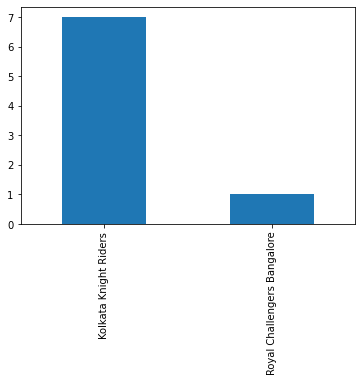

In [56]:
match2['winner'].value_counts().plot.bar()
plt.show()

Kolkata won 7 times and Bangalore won only 1 time against each other at Bangalore home ground.

In [30]:
match2['toss_winner'].value_counts()

Kolkata Knight Riders    8
Name: toss_winner, dtype: int64

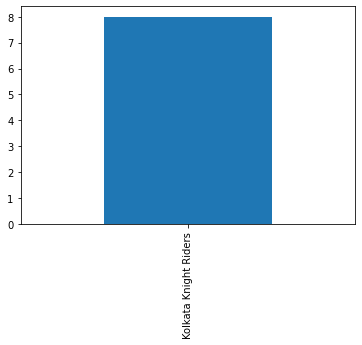

In [57]:
match2['toss_winner'].value_counts().plot.bar()
plt.show()

Kolkata won the toss every time.

In [31]:
match2['toss_decision'].value_counts()

field    8
Name: toss_decision, dtype: int64

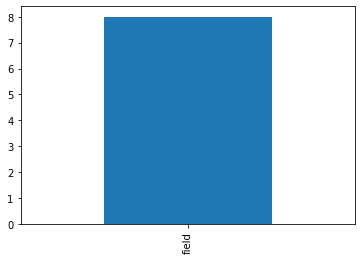

In [58]:
match2['toss_decision'].value_counts().plot.bar()
plt.show()

Kolkata always chose to field first after winning toss at Bangalore home ground.

In [32]:
match2[match2['toss_winner'] == match2['winner']]['winner'].value_counts()

Kolkata Knight Riders    7
Name: winner, dtype: int64

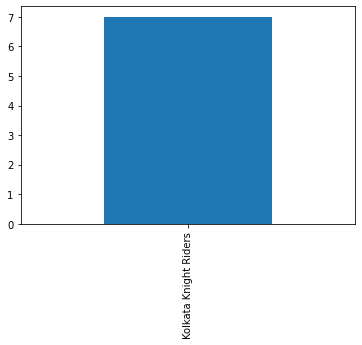

In [59]:
match2[match2['toss_winner'] == match2['winner']]['winner'].value_counts().plot.bar()
plt.show()

Kolkata won 7 times after winning toss at Bangalore home ground.

In [33]:
delivery1 = df1[(df1['match_id'] == ids1[0]) | (df1['match_id'] == ids1[1]) | (df1['match_id'] == ids1[2]) | (df1['match_id'] == ids1[3]) | (df1['match_id'] == ids1[4]) | (df1['match_id'] == ids1[5]) | (df1['match_id'] == ids1[6]) | (df1['match_id'] == ids1[7])]
delivery1.head()

match_id  inning                 batting_team           bowling_team  \
10407        45       1  Royal Challengers Bangalore  Kolkata Knight Riders   
10408        45       1  Royal Challengers Bangalore  Kolkata Knight Riders   
10409        45       1  Royal Challengers Bangalore  Kolkata Knight Riders   
10410        45       1  Royal Challengers Bangalore  Kolkata Knight Riders   
10411        45       1  Royal Challengers Bangalore  Kolkata Knight Riders   

       over  ball   batsman    non_striker    bowler  is_super_over  ...  \
10407     1     1  CH Gayle  Mandeep Singh  UT Yadav              0  ...   
10408     1     2   V Kohli  Mandeep Singh  UT Yadav              0  ...   
10409     1     3   V Kohli  Mandeep Singh  UT Yadav              0  ...   
10410     1     4   V Kohli  Mandeep Singh  UT Yadav              0  ...   
10411     1     5   V Kohli  Mandeep Singh  UT Yadav              0  ...   

       bye_runs  legbye_runs  noball_runs  penalty_runs  batsman_runs  \
10407         0            0            0             0             0   
10408         0            0            0             0             0   
10409         0            0            0             0             0   
10410         0            0            0             0             0   
10411         0            0            0             0             0   

       extra_runs  total_runs  player_dismissed dismissal_kind    fielder  
10407           0           0          CH Gayle         caught  G Gambhir  
10408           0           0               NaN            NaN        NaN  
10409           0           0               NaN            NaN        NaN  
10410           0           0               NaN            NaN        NaN  
10411           0           0               NaN            NaN        NaN  

[5 rows x 21 columns]

Getting the details ball by ball of the matches played between Bangalore and Kolkata at Bangalore home ground.

## Dinesh Karthik playing for Kolkata at Bangalore Home Ground:

In [34]:
total_run_Dinesh_Karthik_kkr_at_Bangalore = delivery1[delivery1['batsman'] == 'KD Karthik']['batsman_runs'].sum()
total_run_Dinesh_Karthik_kkr_at_Bangalore

82

Dinesh Karthik for Kolkata scored 82 runs against Bangalore at Bangalore home ground while playing for Kolkata.

In [35]:
total_matches_against_Bangalore_for_Kolkata_at_bangalore = len(delivery1[delivery1['batsman'] == 'KD Karthik']['match_id'].value_counts())
total_matches_against_Bangalore_for_Kolkata_at_bangalore

3

Dinesh Karthik played 3 matches against Bangalore and being in Kolkata at Bangalore home ground.

In [36]:
avg_run_Dinesh_Karthik_kkr_at_bangalore = math.ceil(total_run_Dinesh_Karthik_kkr_at_Bangalore/total_matches_against_Bangalore_for_Kolkata_at_bangalore)
avg_run_Dinesh_Karthik_kkr_at_bangalore

28

Dinesh Karthik scored an average of 28 per match against Bangalore and being in Kolkata at Bangalore home ground.

In [37]:
total_run_Dinesh_Karthik_batting_first_kkr_at_Bangalore = delivery1[(delivery1['batsman'] == 'KD Karthik') & (delivery1['inning']==1)]['batsman_runs'].sum()
total_run_Dinesh_Karthik_batting_first_kkr_at_Bangalore

0

Dinesh Karthik didn't bat for Kolkata in the first inning at Bangalore home ground yet.

In [38]:
total_run_Dinesh_Karthik_batting_second_kkr_at_Bangalore = delivery1[(delivery1['batsman'] == 'KD Karthik') & (delivery1['inning']==2)]['batsman_runs'].sum()
total_run_Dinesh_Karthik_batting_second_kkr_at_Bangalore

82

Dinesh Karthik scored 82 runs while batting in second inning at Bangalore home ground.

## No Balls at Bangalore Home Ground:

In [39]:
total_no_balls_at_Bangalore = delivery1['noball_runs'].sum()
total_no_balls_at_Bangalore

6

Total 6 no balls bowled at Bangalore home ground.

In [40]:
noballs_by_kolkata_at_Bangalore = delivery1[delivery1['bowling_team'] == 'Kolkata Knight Riders']['noball_runs'].sum()
noballs_by_kolkata_at_Bangalore

3

Kolkata bowled 3 no balls against Bangalore.

In [41]:
noballs_by_bangalore_at_bangalore = delivery1[delivery1['bowling_team'] == 'Royal Challengers Bangalore']['noball_runs'].sum()
noballs_by_bangalore_at_bangalore

3

Bangalore also bowled 3 no balls against Kolkata.

In [63]:
avg_no_balls_at_Bangalore = math.ceil(total_no_balls_at_Bangalore/len(ids1))
avg_no_balls_at_Bangalore

1

There is 1 no ball in an average per match at Bangalore home ground.

## Virat Kohli 4's at Bangalore home ground:

In [42]:
total_4s_by_Virat_Kohli_at_Bangalore = len(delivery1[(delivery1['batsman'] == 'V Kohli') & (delivery1['batsman_runs'] == 4)]['batsman_runs'])
total_4s_by_Virat_Kohli_at_Bangalore

30

Virat Kohli hit 30 fours against Kolkata at Bangalore home ground till now.

In [43]:
total_4s_by_Virat_Kohli_1st_inning_at_Bangalore = len(delivery1[(delivery1['batsman'] == 'V Kohli') & (delivery1['batsman_runs'] == 4) & (delivery1['inning'] == 1)]['batsman_runs'])
total_4s_by_Virat_Kohli_1st_inning_at_Bangalore

30

Virat Kohli hit all 30 fours against Kolkata at Bangalore home ground in the first inning only as they haven't bat in the second inning against Kolkata at their home ground.

In [65]:
avg_4s_by_Virat_Kohli_at_Bangalore = math.ceil(total_4s_by_Virat_Kohli_at_Bangalore/len(ids1))
avg_4s_by_Virat_Kohli_at_Bangalore

4

Virat Kohli hit 4 fours in an average per match at Bangalore home ground.